<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Digit_Recognition_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load our Datasets
train_df = pd.read_csv("/content/drive/MyDrive/datasets/digits/train.csv")

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Separate our Label to our Data
X = train_df.drop("label", axis=1)
Y = train_df["label"]

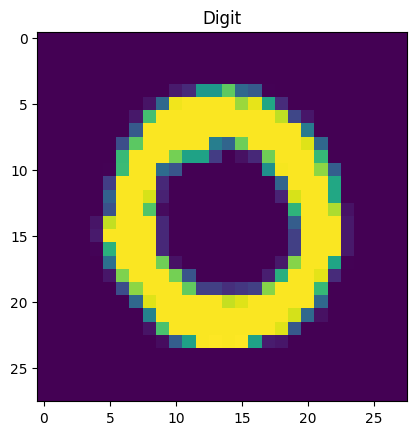

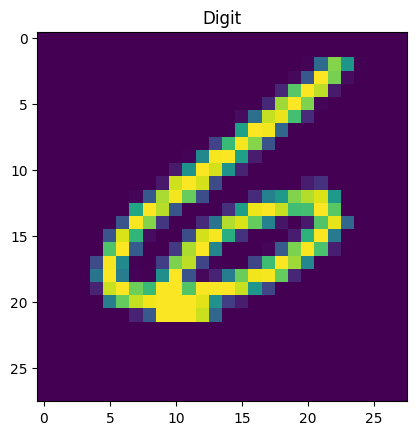

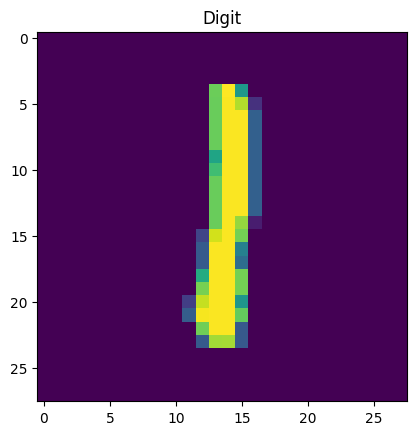

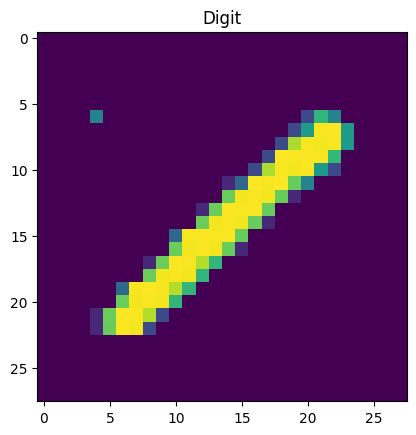

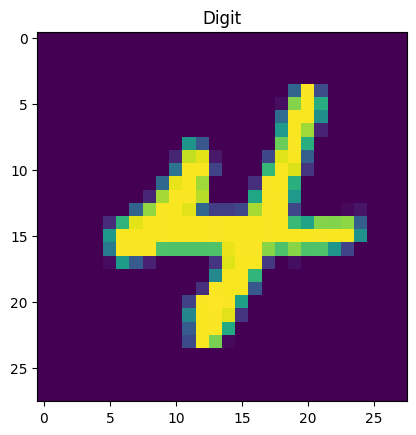

In [ ]:
#Take a look at our images
for x in range(1, 100, 20):
    image = np.reshape(X.iloc[x], (28, 28))
    plt.title("Digit")
    plt.imshow(image)
    plt.show()

In [ ]:
#Do Standard Scaling on our training data
scaler = StandardScaler()

X2 = scaler.fit_transform(X)

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.2, random_state=20
)

In [ ]:
#Use our SVC Model
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)

SVC()

In [ ]:
pred = svc.predict(X_test)

print(f" Y Test Values: \n {y_test[15:20]}")
print(f"Pred Values: \n {pred[15:20]}")

 Y Test Values: 
 7893     5
41023    4
3824     1
15950    9
25131    1
Name: label, dtype: int64
Pred Values: 
 [5 4 1 9 1]


In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9761904761904762


In [ ]:
#Use our Linear SVC Model
#linearsvc = LinearSVC()
#linearsvc.fit(X_train, y_train)

In [ ]:
#pred = linearsvc.predict(X_test)

#print(f" Y Test Values: \n {y_test[15:20]}")
#print(f"Pred Values: \n {pred[15:20]}")

In [ ]:
#Accuracy
#accuracy = accuracy_score(y_test, pred)
#print(accuracy)

In [ ]:
#Save our model
import joblib

joblib.dump(svc, "digit_recognition_chatgpt.joblib")

['digit_recognition_chatgpt.joblib']